# Iris Flower Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)

In [3]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
print("Shape of dataset:", df.shape)
print("\nColumn types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

Shape of dataset: (150, 5)

Column types:
 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Duplicates: 1


In [5]:
df.drop_duplicates(inplace=True)
print("\nDuplicates:", df.duplicated().sum())


Duplicates: 0


## Descriptive Statistics

In [6]:
print("\nSummary Statistics:\n", df.describe(include='all'))


Summary Statistics:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
count          149.000000        149.000000         149.000000   
unique                NaN               NaN                NaN   
top                   NaN               NaN                NaN   
freq                  NaN               NaN                NaN   
mean             5.843624          3.059732           3.748993   
std              0.830851          0.436342           1.767791   
min              4.300000          2.000000           1.000000   
25%              5.100000          2.800000           1.600000   
50%              5.800000          3.000000           4.300000   
75%              6.400000          3.300000           5.100000   
max              7.900000          4.400000           6.900000   

        petal width (cm) species  
count         149.000000     149  
unique               NaN       3  
top                  NaN  setosa  
freq                 NaN      50  
mean      

## Univariate Analysis

In [7]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())


Value counts for 'species':
species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64


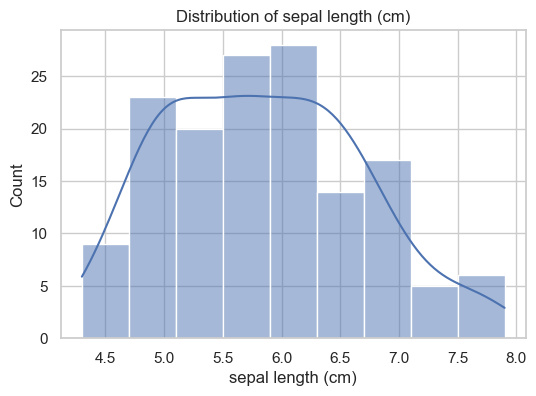

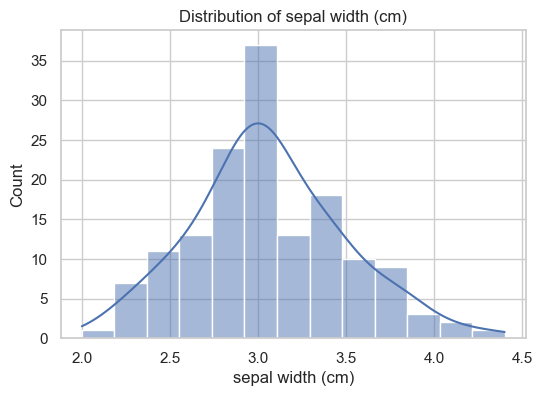

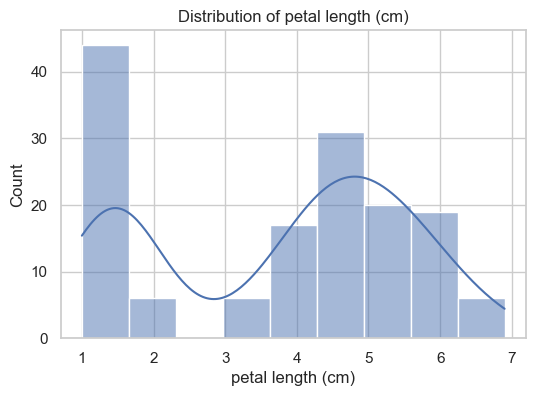

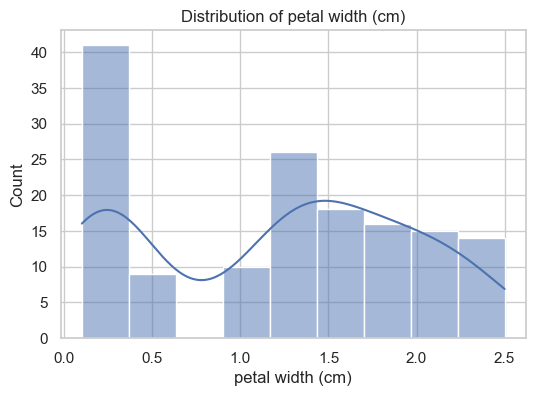

In [8]:
for col in df.select_dtypes(include=[np.number]).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

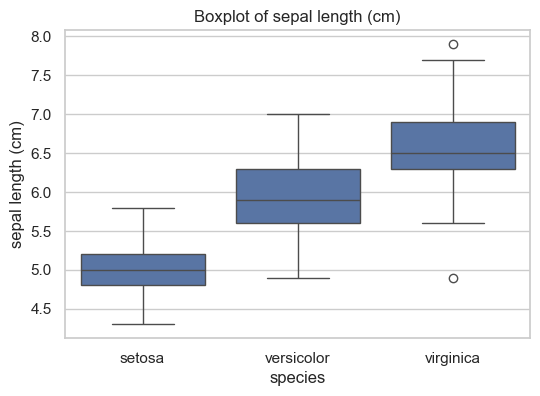

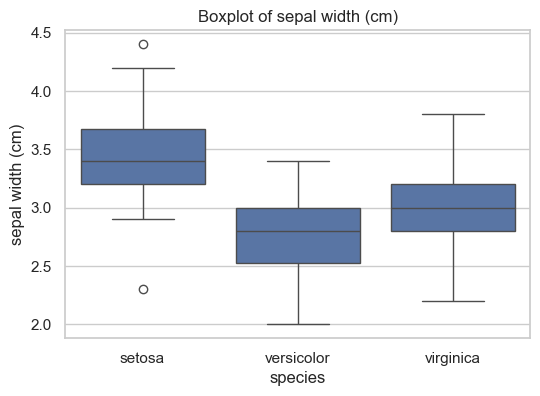

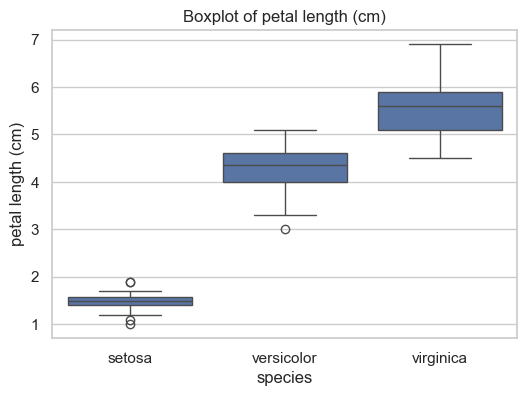

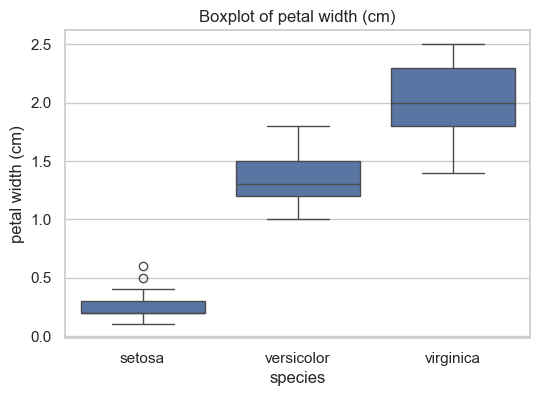

In [9]:
for col in df.select_dtypes(include=[np.number]).columns:
    sns.boxplot(x="species", y=col, data=df)
    plt.title(f"Boxplot of {col}")
    plt.show()

## Bivariate Analysis

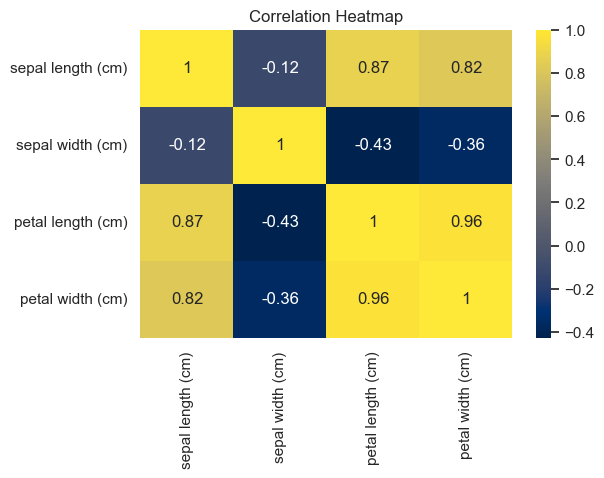

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='cividis')
plt.title("Correlation Heatmap")
plt.show()

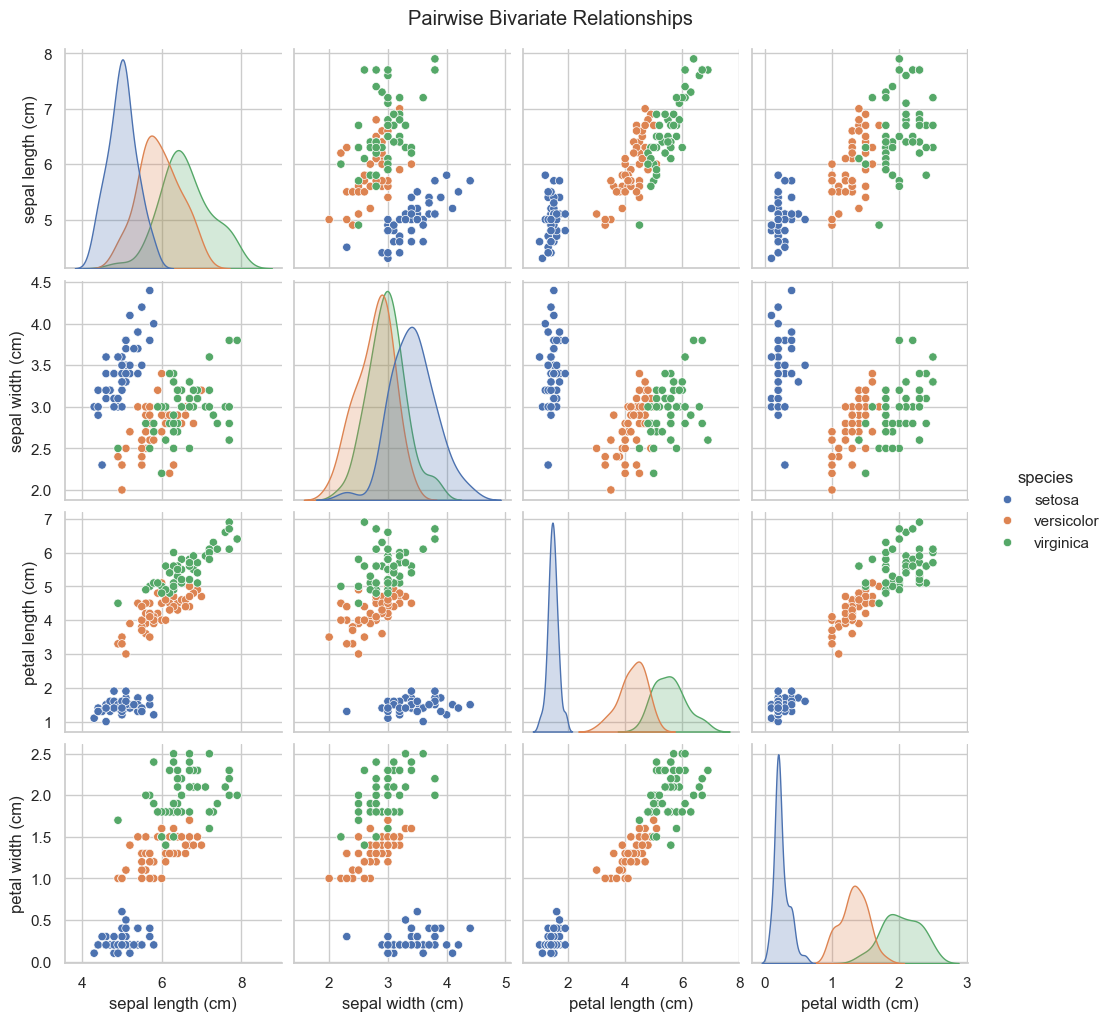

In [11]:
sns.pairplot(df, hue='species')
plt.suptitle('Pairwise Bivariate Relationships', y=1.02)
plt.show()

## Model Building

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("Average accuracy:", cross_val_score(model, X, y, cv=5).mean())
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Accuracy: 1.0
Average accuracy: 0.9666666666666668
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [16]:
import joblib

joblib.dump(scaler, 'models/scaler.pkl')
joblib.dump(model, 'models/iris_model.pkl')

['models/iris_model.pkl']

In [17]:
new_data = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=iris.feature_names)
new_data_scaled = scaler.transform(new_data)
pred = model.predict(new_data_scaled)[0]
print("Predicted species:", pred)

Predicted species: setosa
